In [89]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

font_size = 30
font_size_ticks = 25

np.set_printoptions(precision=5)

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

file_path = "./data/weather/hourly_precipitation_2015.npy"

# data_matrix contains precipitation data from 134 stations (each station is a column)
data_matrix = np.load(file_path)

print(data_matrix.shape) 
print(data_matrix[25:35,:10])

(8760, 134)
[[0.  1.  0.3 0.7 0.  0.2 1.  0.2 0.  0.4]
 [0.  0.4 0.2 0.3 0.  0.6 1.9 1.1 0.  0. ]
 [0.  0.6 0.  0.  0.  0.2 0.7 1.1 0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.4 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
 [0.  0.  0.6 0.2 0.  0.  0.5 0.2 0.  0.7]
 [0.  0.  0.9 0.9 0.  0.  1.3 0.  0.  0.6]
 [0.  0.3 0.6 1.2 0.  0.4 1.9 0.  0.  0.2]
 [0.  0.  0.3 0.  0.  0.6 0.6 0.4 0.  0.6]
 [0.  0.  0.5 0.  0.  0.2 0.5 0.6 0.  0.3]]


In [90]:
# We select three stations to study, stations contains the corresponding indices in data_matrix
# 24: Bodega, CA
# 99: Coos Bay, OR
# 102: Riley, OR
stations = [24,99,102]

In [93]:
# Compute joint pmf of three Bernoulli random variables indicating whether it rains (1) or not (0)
# in Bodega, Coos Bay and Riley
def compute_joint_pmf(station_1,station_2,station_3,data_matrix):
    # INSERT YOUR CODE HERE
    data_1 = np.where(data_matrix[:,station_1] > 0, 1, 0)
    data_2 = np.where(data_matrix[:,station_2] > 0, 1, 0)
    data_3 = np.where(data_matrix[:,station_3] > 0, 1, 0)
    
    counts = np.zeros(8)
    
    for i in range(len(data_matrix)):
        if data_1[i] == 0:
            if data_2[i] == 0:
                if data_3[i] == 0:
                    counts[0]+=1
                else:
                    counts[1]+=1
            else:
                if data_3[i] == 0:
                    counts[2]+=1
                else:
                    counts[3]+=1
        else:
            if data_2[i] == 0:
                if data_3[i] == 0:
                    counts[4]+=1
                else:
                    counts[5]+=1
            else:
                if data_3[i] == 0:
                    counts[6]+=1
                else:
                    counts[7]+=1
    
    joint_pmf = counts/len(data_matrix)
    
    return counts, joint_pmf

counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
print(counts)
print(joint_pmf)

[7472.  186.  814.   89.   88.   21.   75.   15.]
[0.85297 0.02123 0.09292 0.01016 0.01005 0.0024  0.00856 0.00171]


[0.97728 0.02272]
[0.88664 0.11336]
[0.9645 0.0355]


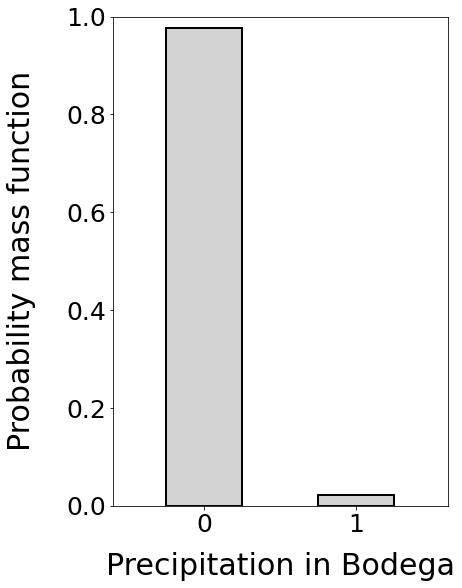

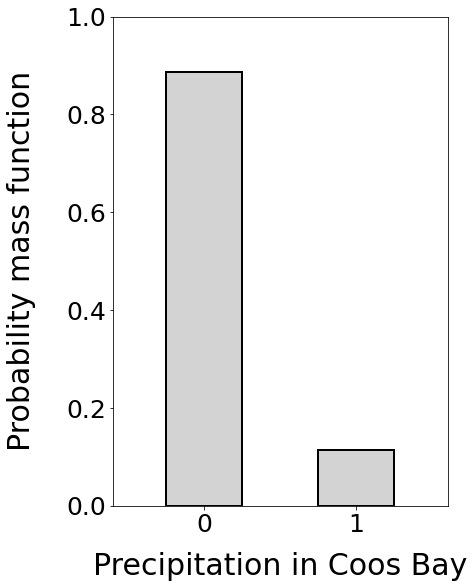

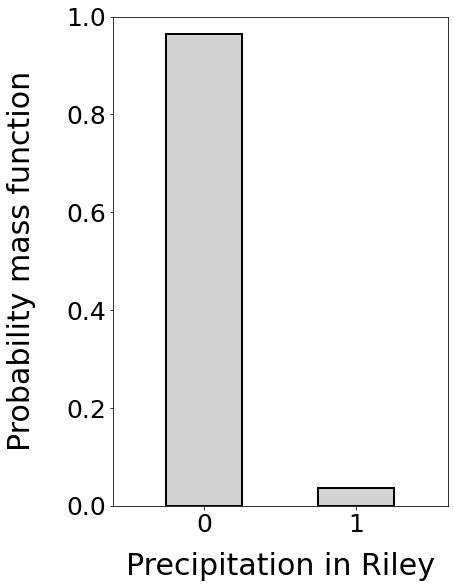

In [55]:
# Compute marginal pmf of each of the Bernoulli random variables 
def marginal_1_station(joint_pmf):
    # INSERT YOUR CODE HERE
    counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
    
    marginal_pmf_1 = np.array([joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3],
                               joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]])
    
    marginal_pmf_2 = np.array([joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5],
                               joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]])
    
    marginal_pmf_3 = np.array([joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6],
                               joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]])
    
    return marginal_pmf_1,marginal_pmf_2,marginal_pmf_3

marginal_pmf_1,marginal_pmf_2,marginal_pmf_3 = marginal_1_station(joint_pmf)
print(marginal_pmf_1)
print(marginal_pmf_2)
print(marginal_pmf_3)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6
plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_1.pdf',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_2.pdf',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_3, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_3.pdf',bbox_inches="tight")

In [94]:
# Compute marginal joint pmf of each pair of the Bernoulli random variables 
def marginal_2_stations(joint_pmf):
    # INSERT YOUR CODE HERE
    counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
    
    marginal_pmf_12 = np.array([[joint_pmf[0]+joint_pmf[1],joint_pmf[2]+joint_pmf[3]],
                               [joint_pmf[4]+joint_pmf[5],joint_pmf[6]+joint_pmf[7]]])
    
    marginal_pmf_13 = np.array([[joint_pmf[0]+joint_pmf[2],joint_pmf[1]+joint_pmf[3]],
                               [joint_pmf[4]+joint_pmf[6],joint_pmf[5]+joint_pmf[7]]])
    
    marginal_pmf_23 = np.array([[joint_pmf[0]+joint_pmf[4],joint_pmf[1]+joint_pmf[5]],
                               [joint_pmf[2]+joint_pmf[6],joint_pmf[3]+joint_pmf[7]]])
    
    return marginal_pmf_12,marginal_pmf_13,marginal_pmf_23

marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)

print(marginal_pmf_12)
print(marginal_pmf_13)
print(marginal_pmf_23)

[[0.8742  0.10308]
 [0.01244 0.01027]]
[[0.94589 0.03139]
 [0.01861 0.00411]]
[[0.86301 0.02363]
 [0.10148 0.01187]]


[0.98836 0.01164]
[0.89855 0.10145]
[0.91564 0.08436]
[0.85577 0.14423]
[0.90176 0.09824]
[0.67636 0.32364]
[0.53988 0.46012]
[0.58333 0.41667]
[0.97571 0.02429]
[0.90144 0.09856]
[0.80734 0.19266]
[0.83333 0.16667]


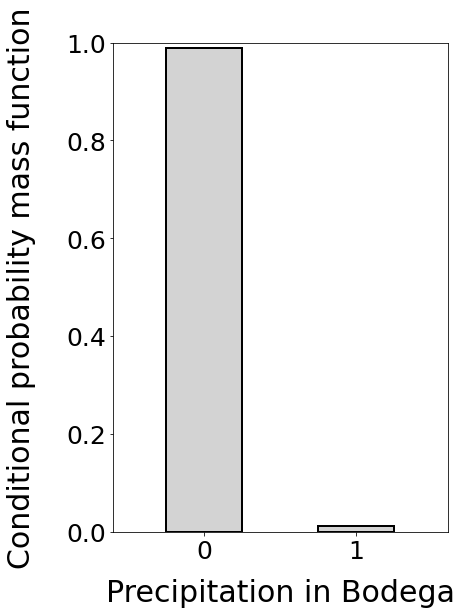

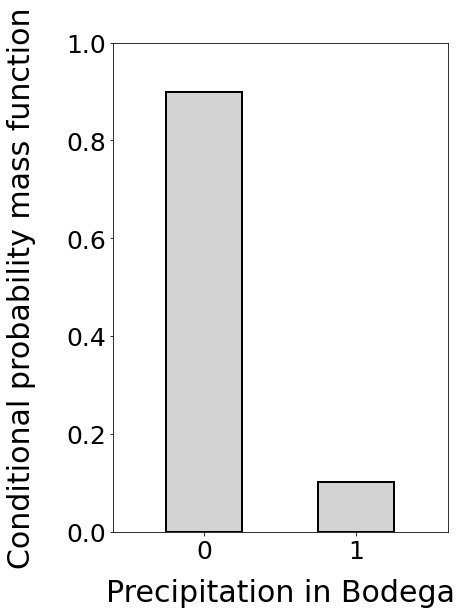

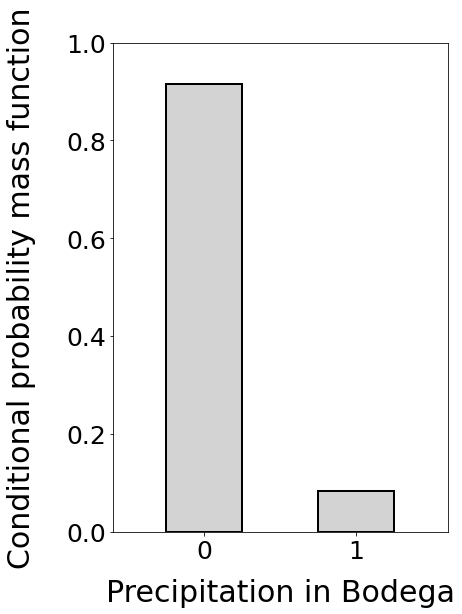

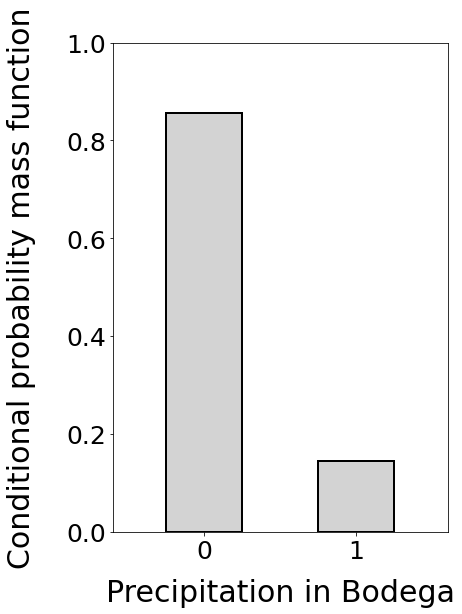

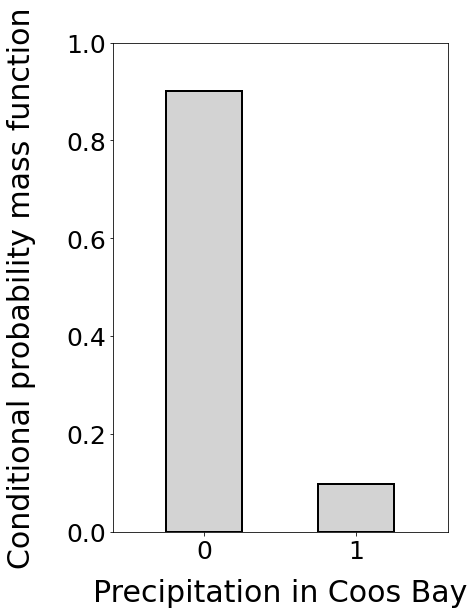

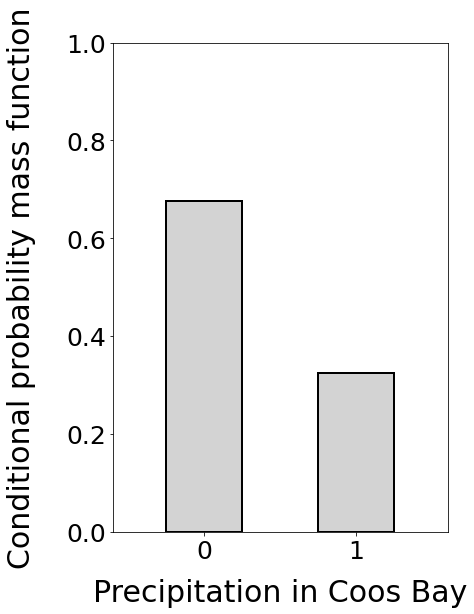

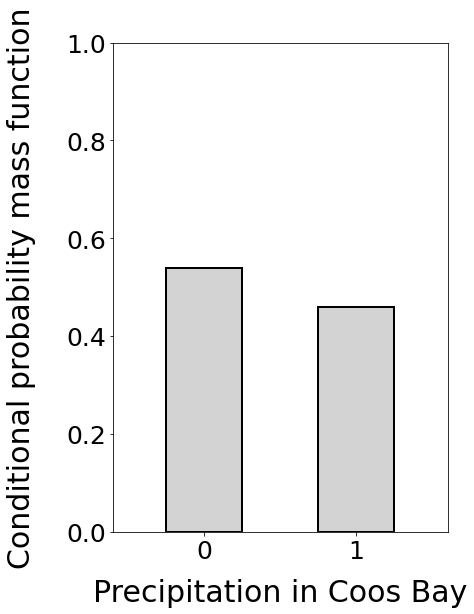

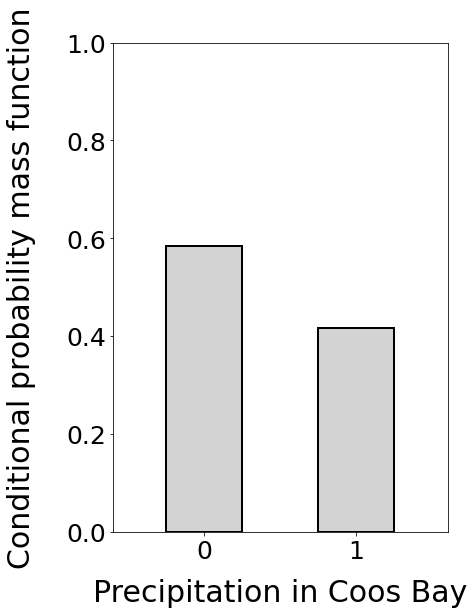

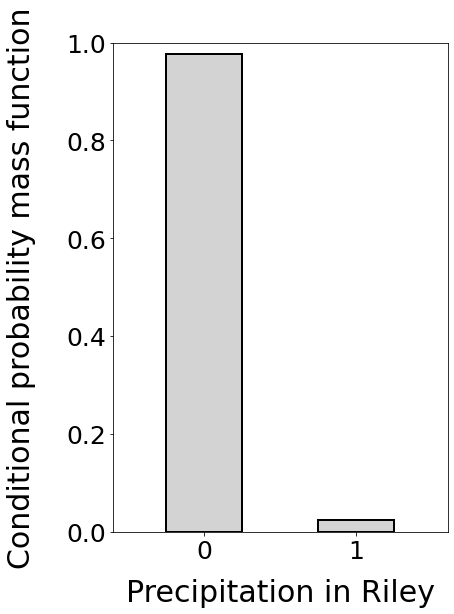

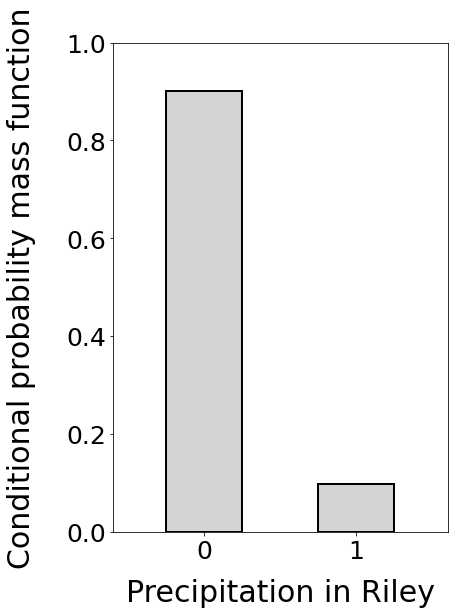

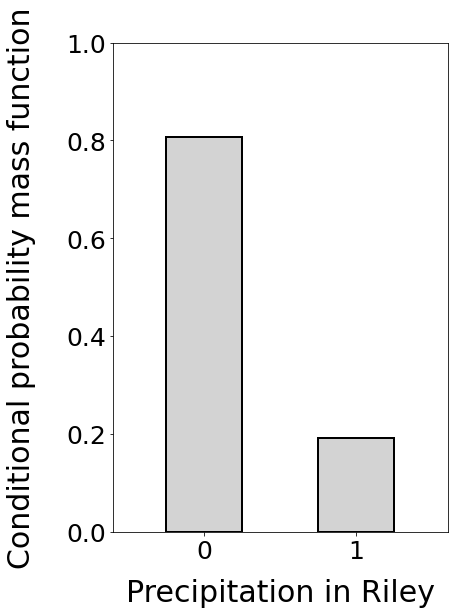

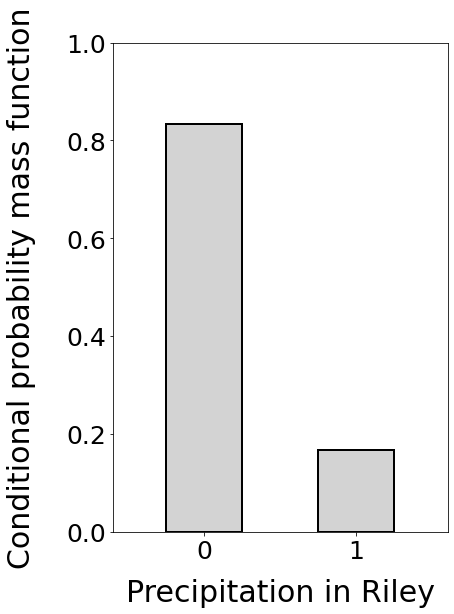

In [99]:
# Compute conditional pmf of each of the Bernoulli random variables given the other two 
def conditional_1_station_given_2(joint_pmf):
    # INSERT YOUR CODE HERE
    counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
    
    cond_1_given_23 = np.array([[[joint_pmf[0]/(joint_pmf[0]+joint_pmf[4]),
                                  joint_pmf[4]/(joint_pmf[0]+joint_pmf[4])],
                                 [joint_pmf[1]/(joint_pmf[1]+joint_pmf[5]),
                                  joint_pmf[5]/(joint_pmf[1]+joint_pmf[5])]],
                                [[joint_pmf[2]/(joint_pmf[2]+joint_pmf[6]),
                                  joint_pmf[6]/(joint_pmf[2]+joint_pmf[6])],
                                 [joint_pmf[3]/(joint_pmf[3]+joint_pmf[7]),
                                  joint_pmf[7]/(joint_pmf[3]+joint_pmf[7])]]])
    
    cond_2_given_13 = np.array([[[joint_pmf[0]/(joint_pmf[0]+joint_pmf[2]),
                                  joint_pmf[2]/(joint_pmf[0]+joint_pmf[2])],
                                 [joint_pmf[1]/(joint_pmf[1]+joint_pmf[3]),
                                  joint_pmf[3]/(joint_pmf[1]+joint_pmf[3])]],
                                [[joint_pmf[4]/(joint_pmf[4]+joint_pmf[6]),
                                  joint_pmf[6]/(joint_pmf[4]+joint_pmf[6])],
                                 [joint_pmf[5]/(joint_pmf[5]+joint_pmf[7]),
                                  joint_pmf[7]/(joint_pmf[5]+joint_pmf[7])]]])
    
    cond_3_given_12 = np.array([[[joint_pmf[0]/(joint_pmf[0]+joint_pmf[1]),
                                  joint_pmf[1]/(joint_pmf[0]+joint_pmf[1])],
                                 [joint_pmf[2]/(joint_pmf[2]+joint_pmf[3]),
                                  joint_pmf[3]/(joint_pmf[2]+joint_pmf[3])]],
                                [[joint_pmf[4]/(joint_pmf[4]+joint_pmf[5]),
                                  joint_pmf[5]/(joint_pmf[4]+joint_pmf[5])],
                                 [joint_pmf[6]/(joint_pmf[6]+joint_pmf[7]),
                                  joint_pmf[7]/(joint_pmf[6]+joint_pmf[7])]]])
    
    return cond_1_given_23,cond_2_given_13,cond_3_given_12

cond_1_given_23,cond_2_given_13,cond_3_given_12 = conditional_1_station_given_2(joint_pmf)

for ind_2 in range(2):
    for ind_3 in range(2):
        print(cond_1_given_23[ind_2][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1_given_23[ind_2][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_2eq'+str(ind_2)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_3 in range(2):
        print(cond_2_given_13[ind_1][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2_given_13[ind_1][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_1eq'+str(ind_1)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_2 in range(2):
        print(cond_3_given_12[ind_1][ind_2])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3_given_12[ind_1][ind_2], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_1eq'+str(ind_1)+'_2eq'+str(ind_2)+'.pdf',bbox_inches="tight")


In [100]:
# Compute conditional joint pmf of each pair of the Bernoulli random variables given the other one
def conditional_2_stations_given_1(joint_pmf):
    # INSERT YOUR CODE HERE
    counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
    
    cond_12_given_3 = np.array([[joint_pmf[0]/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6]),
                                 joint_pmf[2]/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6]),
                                 joint_pmf[4]/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6]),
                                 joint_pmf[6]/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6])],
                                [joint_pmf[1]/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]),
                                 joint_pmf[3]/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]),
                                 joint_pmf[5]/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]),
                                 joint_pmf[7]/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7])]])
    
    cond_13_given_2 = np.array([[joint_pmf[0]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5]),
                                 joint_pmf[1]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5]),
                                 joint_pmf[4]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5]),
                                 joint_pmf[5]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5])],
                                [joint_pmf[2]/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[3]/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[6]/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[7]/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7])]])
    
    cond_23_given_1 = np.array([[joint_pmf[0]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3]),
                                 joint_pmf[1]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3]),
                                 joint_pmf[2]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3]),
                                 joint_pmf[3]/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3])],
                                [joint_pmf[4]/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[5]/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[6]/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]),
                                 joint_pmf[7]/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7])]])
    
    return cond_12_given_3,cond_13_given_2,cond_23_given_1

cond_12_given_3,cond_13_given_2,cond_23_given_1 = conditional_2_stations_given_1(joint_pmf)

for ind in range(2):
    print(cond_12_given_3[ind])
for ind in range(2):
    print(cond_13_given_2[ind])
for ind in range(2):
    print(cond_23_given_1[ind])

[0.88437 0.09634 0.01042 0.00888]
[0.59807 0.28617 0.06752 0.04823]
[0.96202 0.02395 0.01133 0.0027 ]
[0.81974 0.08963 0.07553 0.01511]
[0.8728  0.02173 0.09508 0.0104 ]
[0.44221 0.10553 0.37688 0.07538]


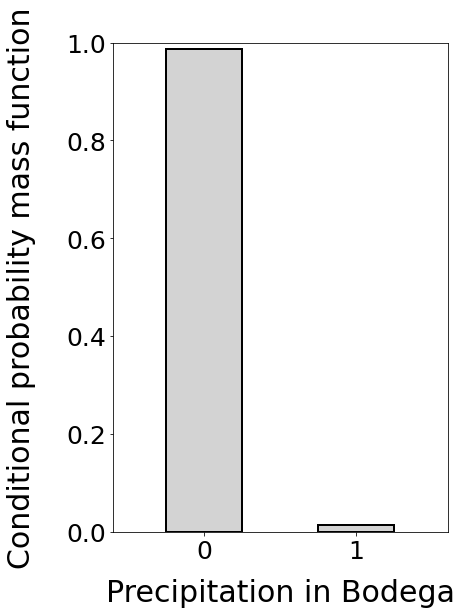

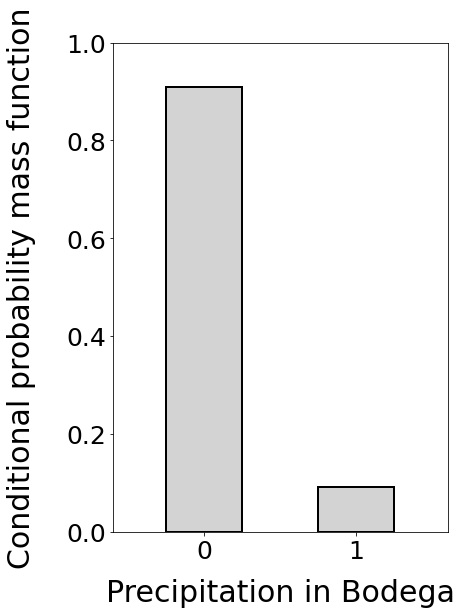

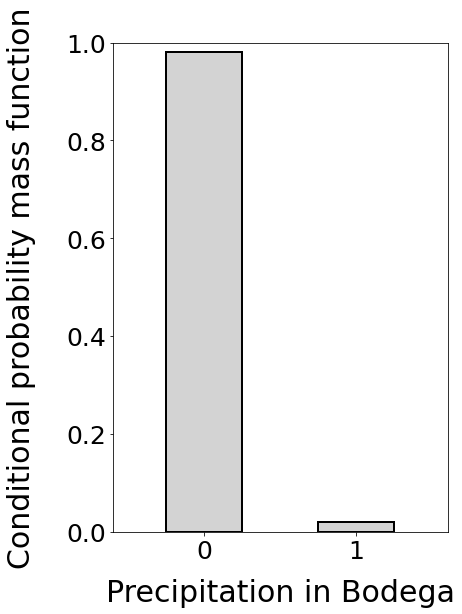

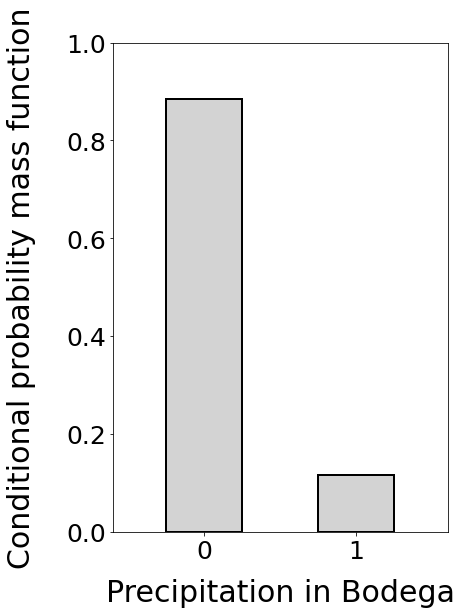

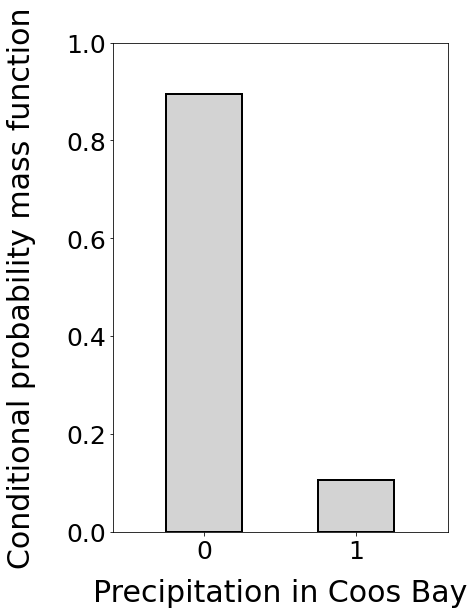

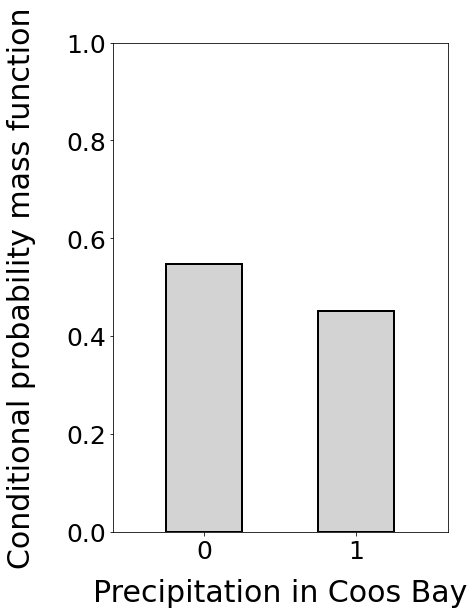

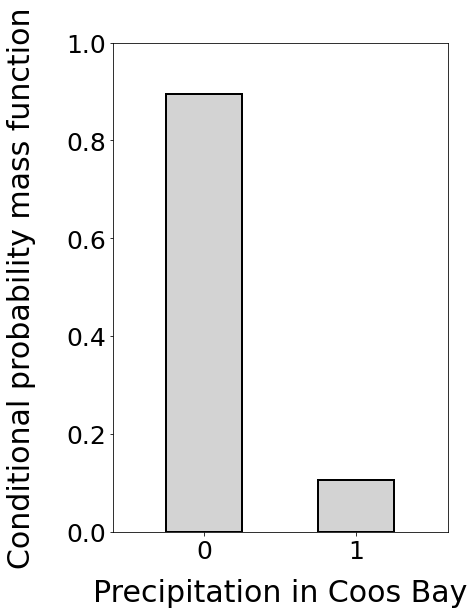

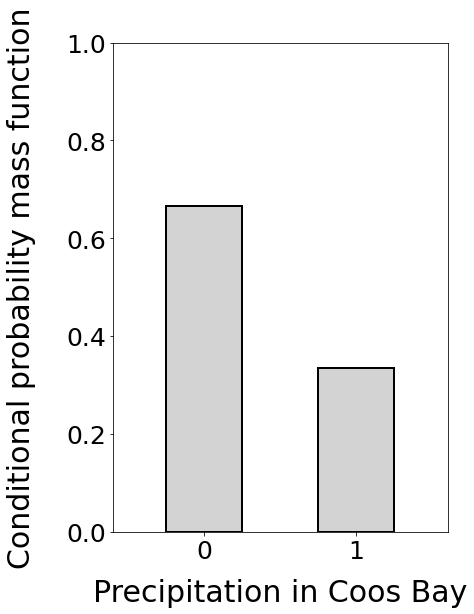

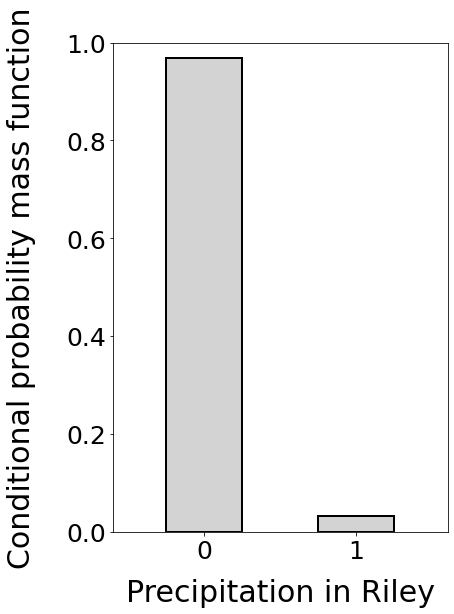

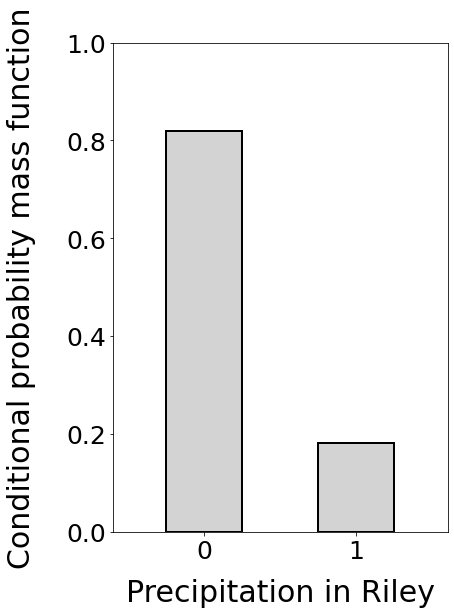

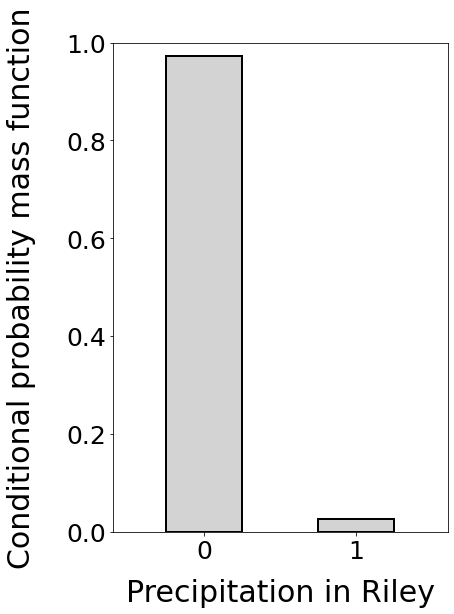

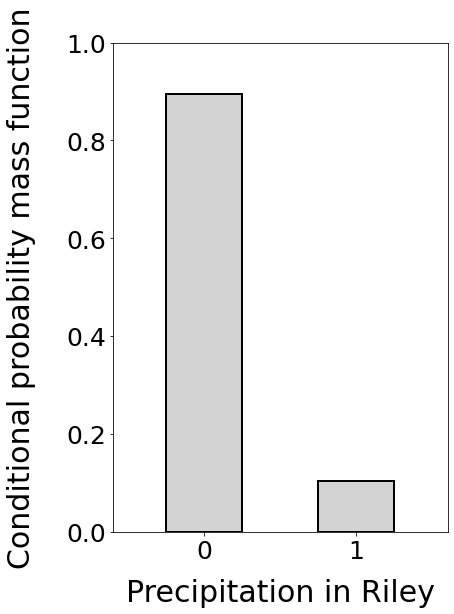

In [102]:
# Compute conditional pmf of each Bernoulli random variable given each of the other ones 
# (i.e. Bodega just conditioned on Coos Bay, Bodega just conditioned on Riley, etc.)
# Use a dictionary to save the conditional pmfs, for example cond_1["2"] should contain the conditional of the
# first random variable (Bodega)
def conditional_1_station_given_1_station(joint_pmf):
    # INSERT YOUR CODE HERE
    counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
    
    cond_1 = {"2":np.array([[(joint_pmf[0]+joint_pmf[1])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5]),
                             (joint_pmf[4]+joint_pmf[5])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5])],
                            [(joint_pmf[2]+joint_pmf[3])/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]),
                             (joint_pmf[6]+joint_pmf[7])/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7])]]),
              "3":np.array([[(joint_pmf[0]+joint_pmf[2])/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6]),
                             (joint_pmf[4]+joint_pmf[6])/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6])],
                            [(joint_pmf[1]+joint_pmf[3])/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]),
                             (joint_pmf[5]+joint_pmf[7])/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7])]])}
    
    cond_2 = {"1":np.array([[(joint_pmf[0]+joint_pmf[1])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3]),
                             (joint_pmf[2]+joint_pmf[3])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3])],
                            [(joint_pmf[4]+joint_pmf[5])/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]),
                             (joint_pmf[6]+joint_pmf[7])/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7])]]),
              "3":np.array([[(joint_pmf[0]+joint_pmf[4])/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6]),
                             (joint_pmf[2]+joint_pmf[6])/(joint_pmf[0]+joint_pmf[2]+joint_pmf[4]+joint_pmf[6])],
                            [(joint_pmf[1]+joint_pmf[5])/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7]),
                             (joint_pmf[3]+joint_pmf[7])/(joint_pmf[1]+joint_pmf[3]+joint_pmf[5]+joint_pmf[7])]])}
    
    cond_3 = {"1":np.array([[(joint_pmf[0]+joint_pmf[2])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3]),
                             (joint_pmf[1]+joint_pmf[3])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[2]+joint_pmf[3])],
                            [(joint_pmf[4]+joint_pmf[6])/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7]),
                             (joint_pmf[5]+joint_pmf[7])/(joint_pmf[4]+joint_pmf[5]+joint_pmf[6]+joint_pmf[7])]]),
              "2":np.array([[(joint_pmf[0]+joint_pmf[4])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5]),
                             (joint_pmf[1]+joint_pmf[5])/(joint_pmf[0]+joint_pmf[1]+joint_pmf[4]+joint_pmf[5])],
                            [(joint_pmf[2]+joint_pmf[6])/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7]),
                             (joint_pmf[3]+joint_pmf[7])/(joint_pmf[2]+joint_pmf[3]+joint_pmf[6]+joint_pmf[7])]])}
    
    return cond_1,cond_2,cond_3
    
cond_1,cond_2,cond_3 = conditional_1_station_given_1_station(joint_pmf)

for given in ["2","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
        
for given in ["1","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")

for given in ["1","2"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
